Note about Gaussian Procces

In [15]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset = "../../all"

In [3]:
metadata = pd.read_csv(dataset+'/test_set_metadata.csv')
list(metadata)

['object_id',
 'ra',
 'decl',
 'gal_l',
 'gal_b',
 'ddf',
 'hostgal_specz',
 'hostgal_photoz',
 'hostgal_photoz_err',
 'distmod',
 'mwebv']

In [4]:
metadata['hostgal_photoz'].isna().sum()

0

In [5]:
metadata['hostgal_photoz_err'].isna().sum()

0

In [6]:
missing = (metadata['distmod'].isna().sum() / len(metadata['distmod'])) * 100
exists = ( (len(metadata['distmod']) - metadata['distmod'].isna().sum()) / len(metadata['distmod'])) * 100

In [7]:
#% of non null distmod vs null distmod
stats = pd.DataFrame({'prop':['missing', 'exists'], 'val':[missing, exists]})
stats.plot.bar(x='prop', y='val')

In [8]:
#get non null distmod interies
distmodPred = metadata[~metadata['distmod'].isna()]
distmodPred.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv
0,13,34.453125,-5.229529,169.987075,-59.956185,1,0.3048,0.3193,0.0542,41.1123,0.019
1,14,33.398438,-4.331149,167.226341,-59.936551,1,NaN,0.6323,0.0179,42.8774,0.018
2,17,348.529419,-61.755440,321.293980,-51.763351,1,NaN,0.8297,0.0605,43.6000,0.016
3,23,34.804688,-5.829153,171.307861,-60.174401,1,NaN,0.6533,0.1479,42.9640,0.023
4,34,351.321442,-64.198746,317.458993,-50.429931,1,0.4557,0.4617,0.0122,42.0540,0.023


In [9]:
X = distmodPred[["hostgal_photoz", "hostgal_photoz_err"]]
y = distmodPred["distmod"]
X.head()

,hostgal_photoz,hostgal_photoz_err
0,0.3193,0.0542
1,0.6323,0.0179
2,0.8297,0.0605
3,0.6533,0.1479
4,0.4617,0.0122


In [10]:
#normalize data
min_max_scaler = preprocessing.MinMaxScaler(copy=False)
X_scaled = min_max_scaler.fit_transform(X)
X.loc[:10,:]

,hostgal_photoz,hostgal_photoz_err
0,0.106195,0.028131
1,0.210556,0.008718
2,0.276374,0.031501
3,0.217558,0.078244
4,0.153674,0.005669
5,0.279408,0.019200
6,0.222093,0.028345
7,0.488630,0.027436
8,0.315217,0.005348
9,0.347559,0.057546


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X.head(1000), y.head(1000), test_size=0.33, random_state=42)
kernel = DotProduct() + WhiteKernel()
gaussian = GaussianProcessRegressor()
gaussian.fit(X_train,y_train)

#need to find a way to split this cause this algo doesn't work on big datasets
#crossVal = cross_validate(gaussian, X.head(10000), y.head(10000), cv=10,return_estimator=True, scoring="neg_mean_squared_log_error",error_score='raise')

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [13]:
gaussian.score(X_test,y_test)

0.9991166461155421

Text(0.5, 0, 'hostgal_photoz')

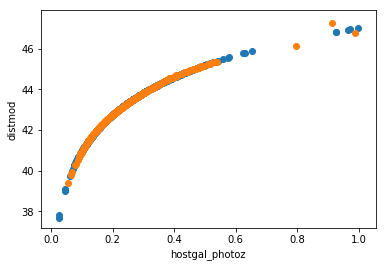

In [17]:
plt.scatter(x=X_train['hostgal_photoz'], y=y_train, label="distmod training")
plt.scatter(x=X_test['hostgal_photoz'], y=gaussian.predict(X_test), label="distmod predicted")
plt.ylabel("distmod")
plt.xlabel("hostgal_photoz")